In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fusée à eau

voir
http://www.aircommandrockets.com/

and 

http://www.et.byu.edu/~wheeler/benchtop/pix/thrust_eqns.pdf

## Ordre de grandeur

Energie pompée VS energie potentielle de gravitation ?

### Energie pompée ?

on part d'une chambre d'un piston, remplie avec un gaz parfait à la pression $P_0$ et de volume $V_0$.

On a d'après la loi des gaz parfait : $P.V = P_0.V_0 = Constante$

Le travail exercé par la pression est $W = \int \! dW$

avec
$$
d W = P.dV = -V.dP
$$

donc 

$$
W = - P_0.V_0 \int_{P_0}^{P_{atm}} \frac{dP}{P} = P_0.V_0 \ln \left[  \frac{P_0}{P_{atm}} \right ]
$$

### Altitude maximale atteignable
L'énergie potentielle au point le plus haut de la trajectoire est  $E_p = mgz_{max}$. A ce point l'énergie cinétique de la fusée est nulle.

Ainsi l'altitude maximale possiblement atteignable est:
$$
z_{max} = \frac{P_0.V_0}{mg} \ln \left[  \frac{P_0}{P_{atm}} \right ]
$$

In [426]:
g = 9.81  # m.s-2
Patm = 1e5  # Pa

P0 = 4*Patm
V0 = 1e-3 # m3
m = 1 # kg

z_max = P0*V0/m/g*np.log( P0/Patm )

print( 'altitude max. : %f  en mètre '%z_max )

altitude max. : 56.525764  en mètre 


Ici n'est pas pris en compte la perte de masse de la fusée du fait de l'expulsion de l'eau et les frottements de l'air sur l'extérieure de la fusée.

Le volume d'air semble devoir être le plus grand possible, comme la masse la plus faible possible, c'est à dire une bouteille sans eau... ceci n'est pas réaliste. La poussée induite par l'expulsion de l'eau doit être considérée.

## Expulsion de l'eau

Un bouteille de diamètre $D$, ayant un goulot de diamètre $d$. Elle est initialement remplie jusqu'à la hauteur $y_0$ d'eau. L'axe des $y$ est vers le bas, avec l'origine au fond de la bouteille.

Le volume initial d'air est donc $\pi /4 \, D^2 $.

$\dot y$ est la vitesse de déplacement de la surface de l'eau dans la bouteille, et $u$ est la vitesse de l'eau quand elle sort de la bouteille. $P$ est la pression de l'air dans la bouteille. 

La **conservation du débit** donne la relation:$$ \dot y \, D² = u\, d^2 $$

La **loi des gaz parfait** permet d'écrire:  $$ y \, P = Constante = y_0 \, P_0 $$

_Rq: adiabatique vs isotherme... ?_

Et enfin, on obtient avec le **théorème de Bernouilli**, la relation suivante:
$$
\dot y ^2 + \frac{2P}{\rho} = u^2
$$

_non visqueux, stationnaire?, incompressible, laminaire_

$$
\dot y ^2 + \frac{2P}{\rho} = \dot y^2 \frac{D^4}{d^4}
$$

$$
\dot y ^2 \left( \frac{D^4}{d^4} -1 \right) = \frac{2P}{\rho}
$$

Dans la suite, on notera $\eta$ le rapport des diamètres (D/d) et $\tilde P$ la pression normée par la densité de l'eau $\rho$.

$$
\dot y ^2 \left( \eta^4 -1 \right) = 2 \tilde P
$$

avec la loi des gaz parfait:
$$
\dot y ^2 \left( \eta^4 -1 \right) = \frac{2\, y_0\, \tilde P_0}{y}
$$

L'équation différentielle finale est donc:
$$
\dot y ^2 \, y = \frac{2\, y_0\, \tilde P_0}{ \eta^4 -1 }
$$

la solution est de la forme: ([merci Wolfram](http://www.wolframalpha.com/input/?i=f*df%2Fdt%5E2+%3D+a))

$$
y(t) = \left(\frac{3}{2}\right)^{2/3} \left( c_1 \pm t\sqrt a  \right)^{2/3}
$$
que l'on peut reécrire plus simplement:
$$
y(t) = \left( B + A\,t  \right)^{2/3}
$$

avec 
$$
A = \frac{3}{2} \sqrt{   \frac{2\, y_0\, \tilde P_0}{ \eta^4 -1 } }
$$ et $$ B=y_0^{3/2} $$

_Remarque:_ Le signe est positif parce que $y$ augmente avec le temps. Quand $y$ devient supérieure à la longueur de la bouteille, le système n'est plus valide et la pousée s'arrete.  

finalement
$$
\dot y (t) = 2/3 \,A \left( B+A\,t \right )^{-1/3}
$$

#### temps finale de la poussée (c.a.d. plus d'eau)
$$
t_f = \frac{L^{3/2} -  y_0^{3/2}}{A}$$

## Poussée aérodynamique

La force de poussée est  (voir [wikipedia](https://fr.wikipedia.org/wiki/Pouss%C3%A9e_(a%C3%A9rodynamique)), avec $q$ le débit massique d'eau ejectée (kg/s): 

$$
F_P(t) = u \cdot q
$$

$$
F_P(t) = u^2 \cdot \rho \, d^2 \,  \pi/4
$$

$$
F_P(t) = \dot y^2 \cdot \eta^2 \, \rho \, d^2 \,  \pi/4
$$

$$
F_P(t) = \dot y^2 \cdot \rho \, D^2 \,  \pi/4
$$

La pousée initiale est :
$$
F_P(t=0) = \frac{4}{9} \frac{A^2}{y_0}  \cdot \eta^2 \, \rho \, d^2 \,  \pi/4
$$

$$
F_P(t=0)  =   \frac{1}{ \eta^4 -1 }  P_0 \, D^2 \,  \pi/2
$$

In [164]:
        # http://percolat.free.fr/0304dimensions.htm
        # http://percolat.free.fr/documentation/silhouettes/echel1_COCACOLA.GIF

In [385]:
class Rocket():
    # Constantes 
    g = 9.81  # m.s-2
    Patm = 1e5  # Pa
    rho = 1000 # kg/m3
    
    def __init__(self, P_0=4*Patm, D=88e-3, d=26e-3, L=330e-3, mVide = .1, alpha=.5 ):
        
        # Parametres
        self.P_0 = P_0 # Pa
        self.D = D # m
        self.d = d # m
        self.L = L # m, longueur de la bouteille
        self.mVide = mVide # kg
        self.alpha = alpha  # proportion volume eau/totale

        
        # Variables de calcul
        self.y0 = self.L*(1-self.alpha)  # m - hauteur d'air

        self.eta = self.D/self.d

        self.A = 3/2*np.sqrt( 2*self.y0*self.P_0/rho/( self.eta**4 - 1 )  )
        self.B = self.y0**(3/2)
        
        self.tf = (self.L**(3/2) - self.y0**(3/2))/self.A # s, durée de propulsion
        
        self.volume = np.pi/4*self.D**2*self.L*1e3
    
    def y_t(self, t):
        return (self.B + self.A*t)**(2/3)
    
    def ydot_t(self, t):
        return 2/3*self.A*(self.B + self.A*t)**(-1/3)
    
    def Fp_t(self, t):
        # Pousse aerodynamique, N
        return self.ydot_t(t)**2 * self.eta**2 *rho*self.d**2 *np.pi/4

    def masse_y( self, y ):
        y_eau = self.L - y
        M = np.pi/4*self.D**2*rho*y_eau + self.mVide
        return M
    
    def masse_t( self, t):
        y = self.y_t( t )
        return self.masse_y( y )
    
    def mdot_t( self, t ):
        ydot = self.ydot_t( t )
        Mdot = -np.pi/4*self.D**2*rho*ydot
        return Mdot
    
    def Fp0(self):
        # Pousée à t=0 (N)
        return self.eta**2/(self.eta**4-1)*self.P_0*self.d**2*np.pi/2

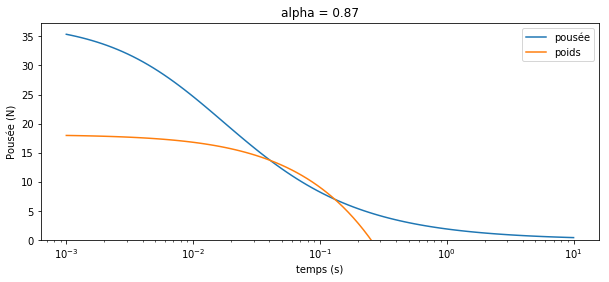

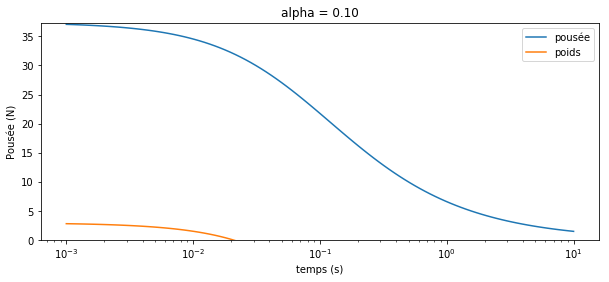

In [422]:
F = Rocket( alpha = .87 )

t = np.logspace( -3, 1, 100 )

plt.figure(figsize=(10, 4)); plt.title('alpha = %.2f'%F.alpha);
plt.semilogx( t, F.Fp_t( t ), label='pousée' );
plt.semilogx( t, F.g*F.masse_t(t) ,label='poids' );
plt.xlabel('temps (s)'); plt.ylabel('Pousée (N)'); plt.ylim([0, F.Fp0()]);
plt.legend();

F = Rocket( alpha = .1 )

plt.figure(figsize=(10, 4)); plt.title('alpha = %.2f'%F.alpha);
plt.semilogx( t, F.Fp_t( t ), label='pousée' );
plt.semilogx( t, F.g*F.masse_t(t) ,label='poids' );
plt.xlabel('temps (s)'); plt.ylabel('Pousée (N)'); plt.ylim([0, F.Fp0()]);
plt.legend();

In [377]:
F.Fp0()

37.3619876206007

On peut à partir de ce modèle determiner le taux de remplissage en eau ($\alpha$) optimal pour atteindre l'altitude maximale.

## Trainée aérodynamique

In [378]:
Cx = .4

[wikipedia](https://fr.wikipedia.org/wiki/Tra%C3%AEn%C3%A9e)

$$
F_v = - \frac{\rho_{air}\,S\, C_x}{2} v^2
$$

In [379]:
# to do

## Calcul de la trajectoire

$$
\frac{d\, mv}{dt} = Poids(t) - F_v( v ) + Fp(t)
$$


$$
m(t)\frac{d\, v}{dt} = Poids(t) - F_v( v ) - v\,\dot m
$$

integration numérique jusqu'à $t_f$, puis une autre si trainé

In [380]:
from scipy.integrate import odeint

In [381]:
def dYdt(y, t, F):
    z, v = y[0], y[1]
    
    dzdt = v
    dvdt = (F.Fp_t(t) -v*F.mdot_t(t) )/F.masse_t(t)  - F.g
    
    return [ dzdt, dvdt ]

def dYdt_balistique(y, t, F):
    m = F.mVide
    
    z, v = y[0], y[1]
    
    dzdt = v
    dvdt = - F.g
    
    return [ dzdt, dvdt ]

In [472]:
F = Rocket(alpha = .6, P_0=5e5)

t_span = np.linspace( 0, F.tf, 30 )
#t_span = [0, F.tf]

y0 = [0, 0]
sol = odeint( dYdt, y0, t_span, args=(F,)  )

In [473]:
z0, v0 = sol[-1, 0], sol[-1, 1]
z_max = v0**2/2/F.g + z0 
tf_balistique = 2*v0/F.g + F.tf

print( z_max )
print( tf_balistique )

t_spanb = np.linspace( F.tf, tf_balistique, 30 )
y0b = sol[-1, :]
sol_balistique = odeint( dYdt_balistique, y0b, t_spanb, args=(F,)  )

20.3007012366
4.13104700424


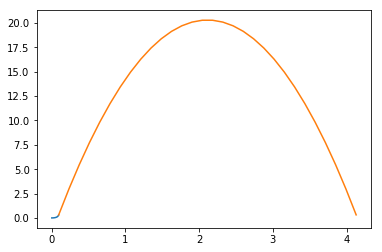

In [475]:
plt.plot( t_span , sol[:, 0] );
plt.plot( t_spanb , sol_balistique[:, 0] );

In [466]:
print( F.volume )
print( F.Fp0() )

2.007100714525447
46.702484525750876


_Remarque:_  Quand $\eta \to 1$, le système diverge... on peut imaginer une fusée sans eau, équivalent à un boulet dans un fût de canon... On sort de l'hypothèse stationnaire du théorème de Bernouilli... il faut prendre en compte l'accélération de l'eau dans la bouteille...

In [467]:
def computeMax( rocket ):
    
    F = rocket

    t_span = [0, F.tf]

    y0 = [0, 0]
    sol = odeint( dYdt, y0, t_span, args=(F,)  )
 
    z0, v0 = sol[-1, 0], sol[-1, 1]
    z_max = v0**2/2/F.g + z0 
    tf_balistique = 2*v0/F.g + F.tf

    return  z_max 

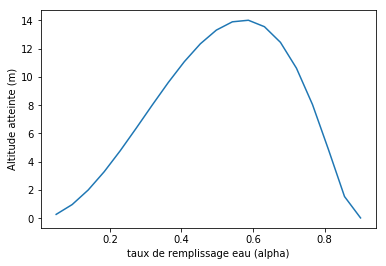

In [478]:
alphas = np.linspace(.05, .9, 20)
zMax = []

for a in alphas:
    zMax.append( computeMax( Rocket( alpha=a ) ) )
    
plt.plot( alphas, zMax );
plt.xlabel('taux de remplissage eau (alpha)');
plt.ylabel('Altitude atteinte (m)');